# Clustering Analysis Using PCA and K-means

Load the dataset and perform exploratory data analysis (EDA) to gain insights into the data’s structure and distribution. Preprocess the data by standardizing the features using a suitable scaling technique.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


## Loading the Dataset

In [3]:
df = pd.read_csv('Country-data.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Preprocessing the dataset

### Checking for missing values

In [ ]:
# missing values check
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# check for outliers
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Exploratory Data Analysis

#### Histograms of each attribute

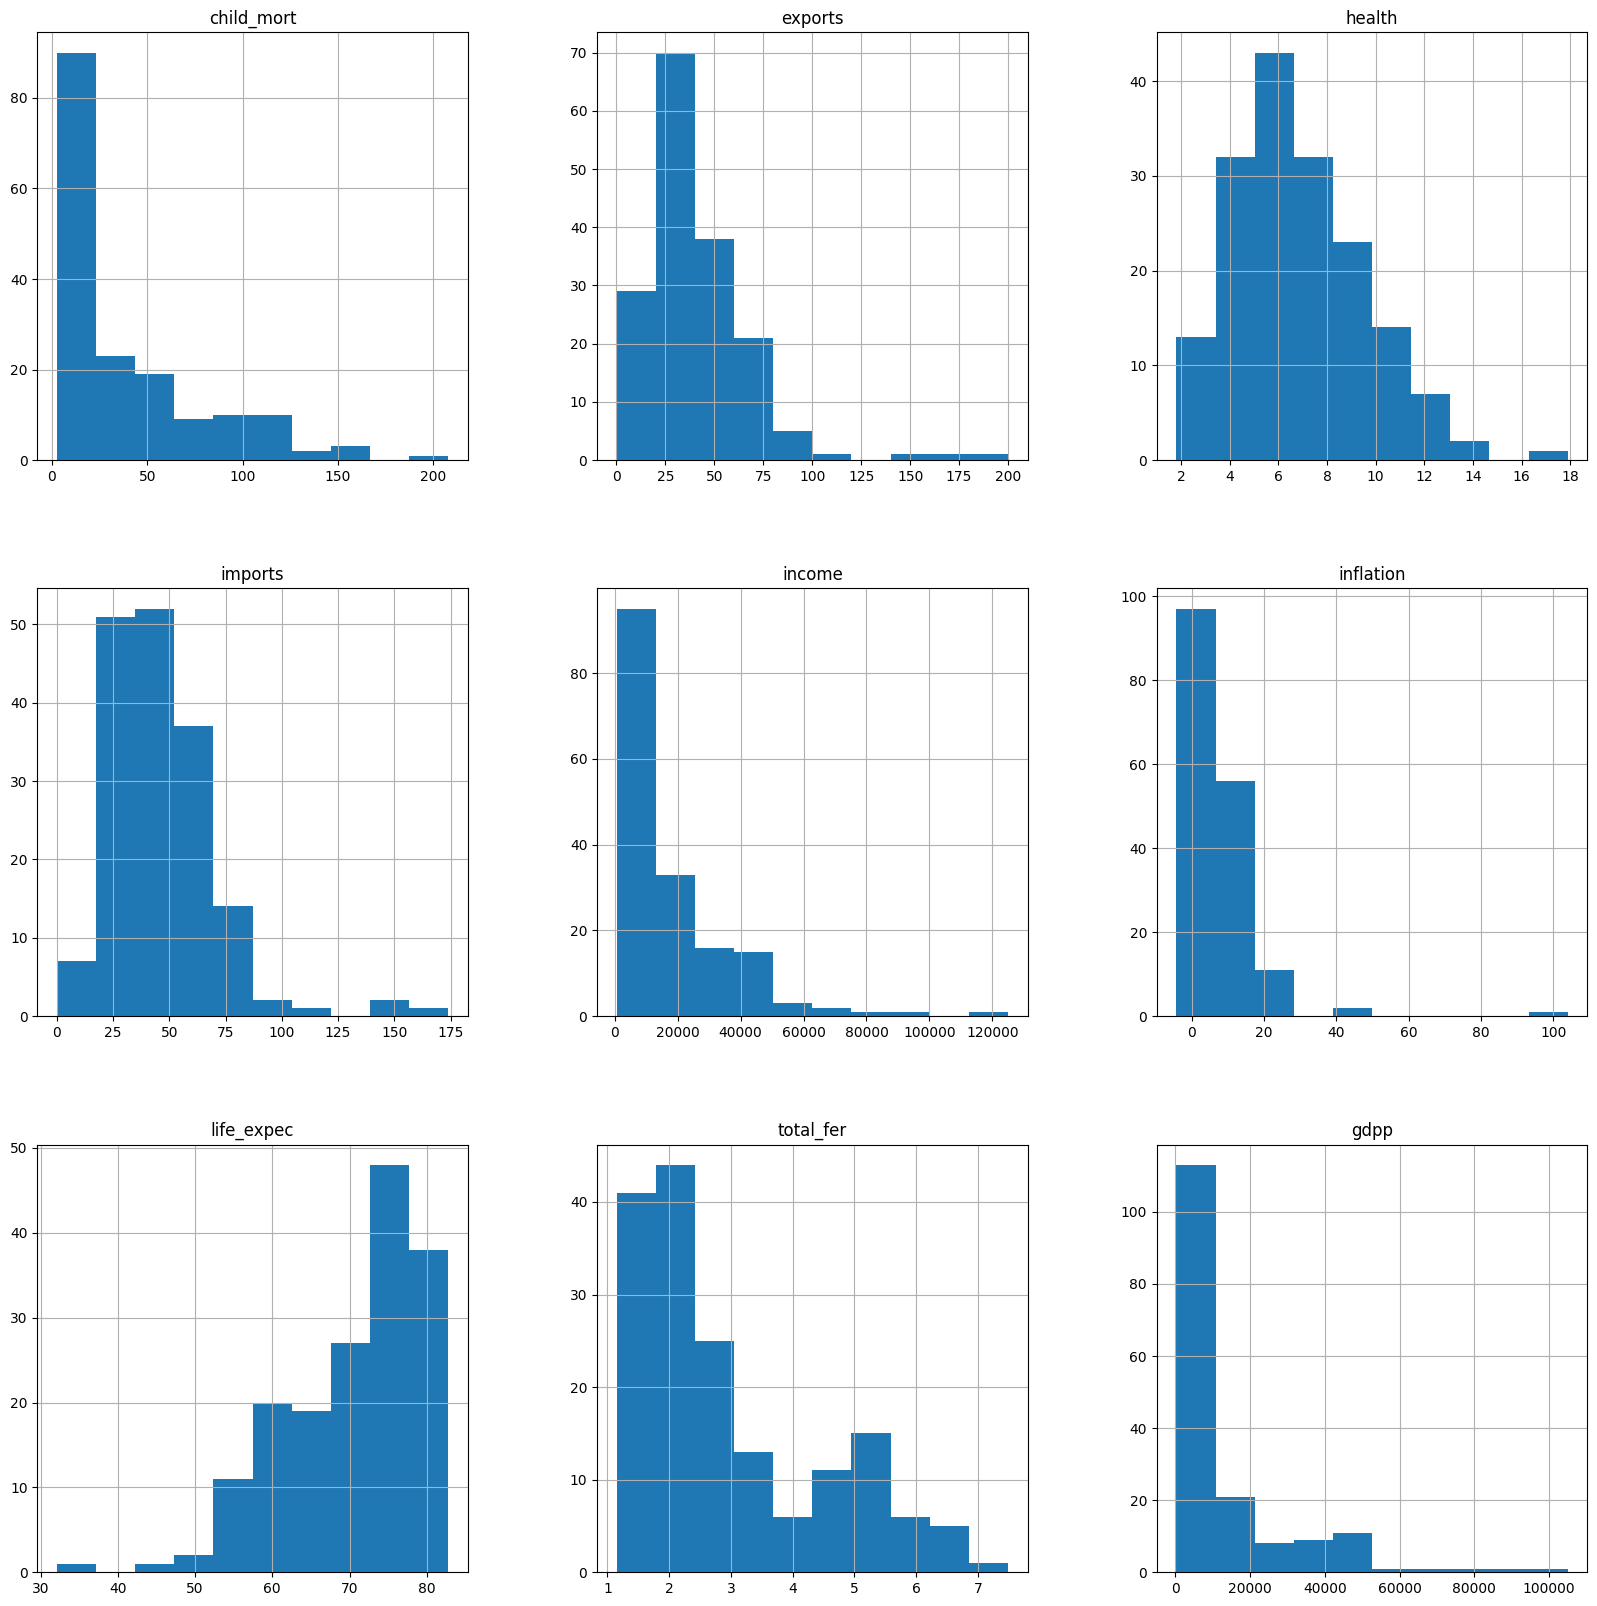

In [ ]:
# Plot distribution of each attribute
df.hist(figsize=(20,20))
plt.show()

#### Pairplots

c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


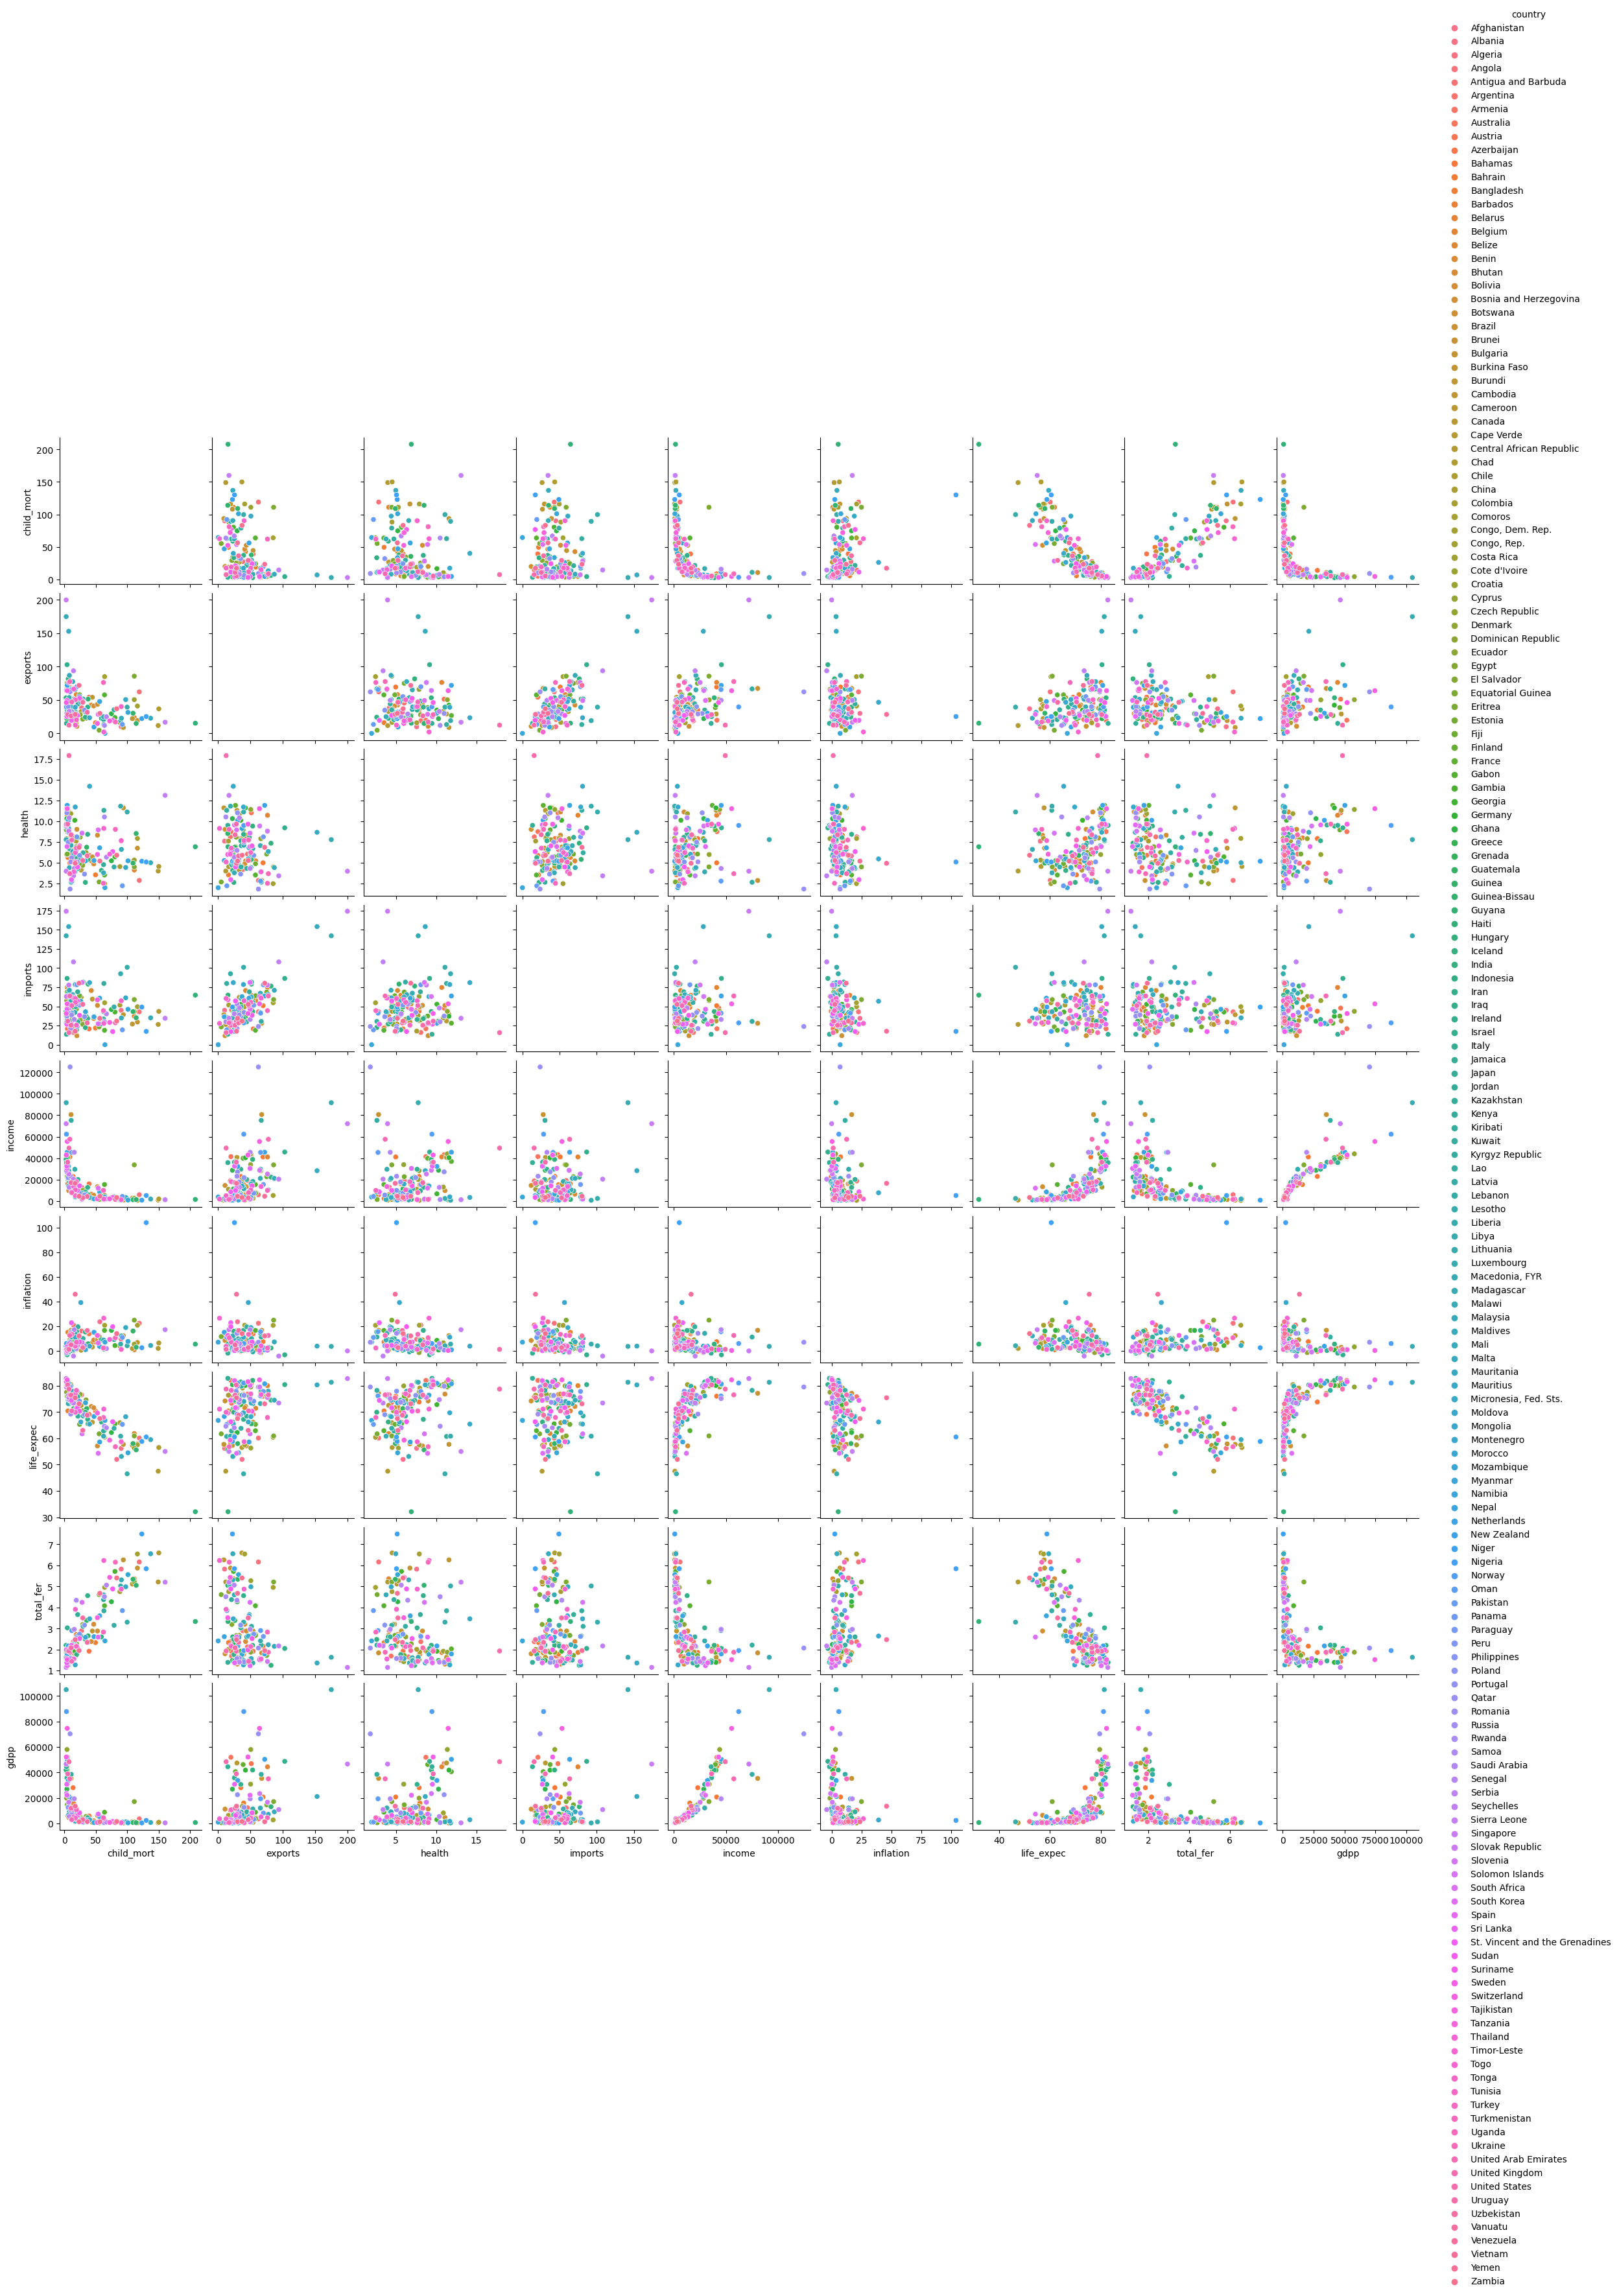

In [ ]:
# plot pairplots to see the relationship between attributes
sns.pairplot(df, diag_kind='kde', hue='country')
plt.show()

c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


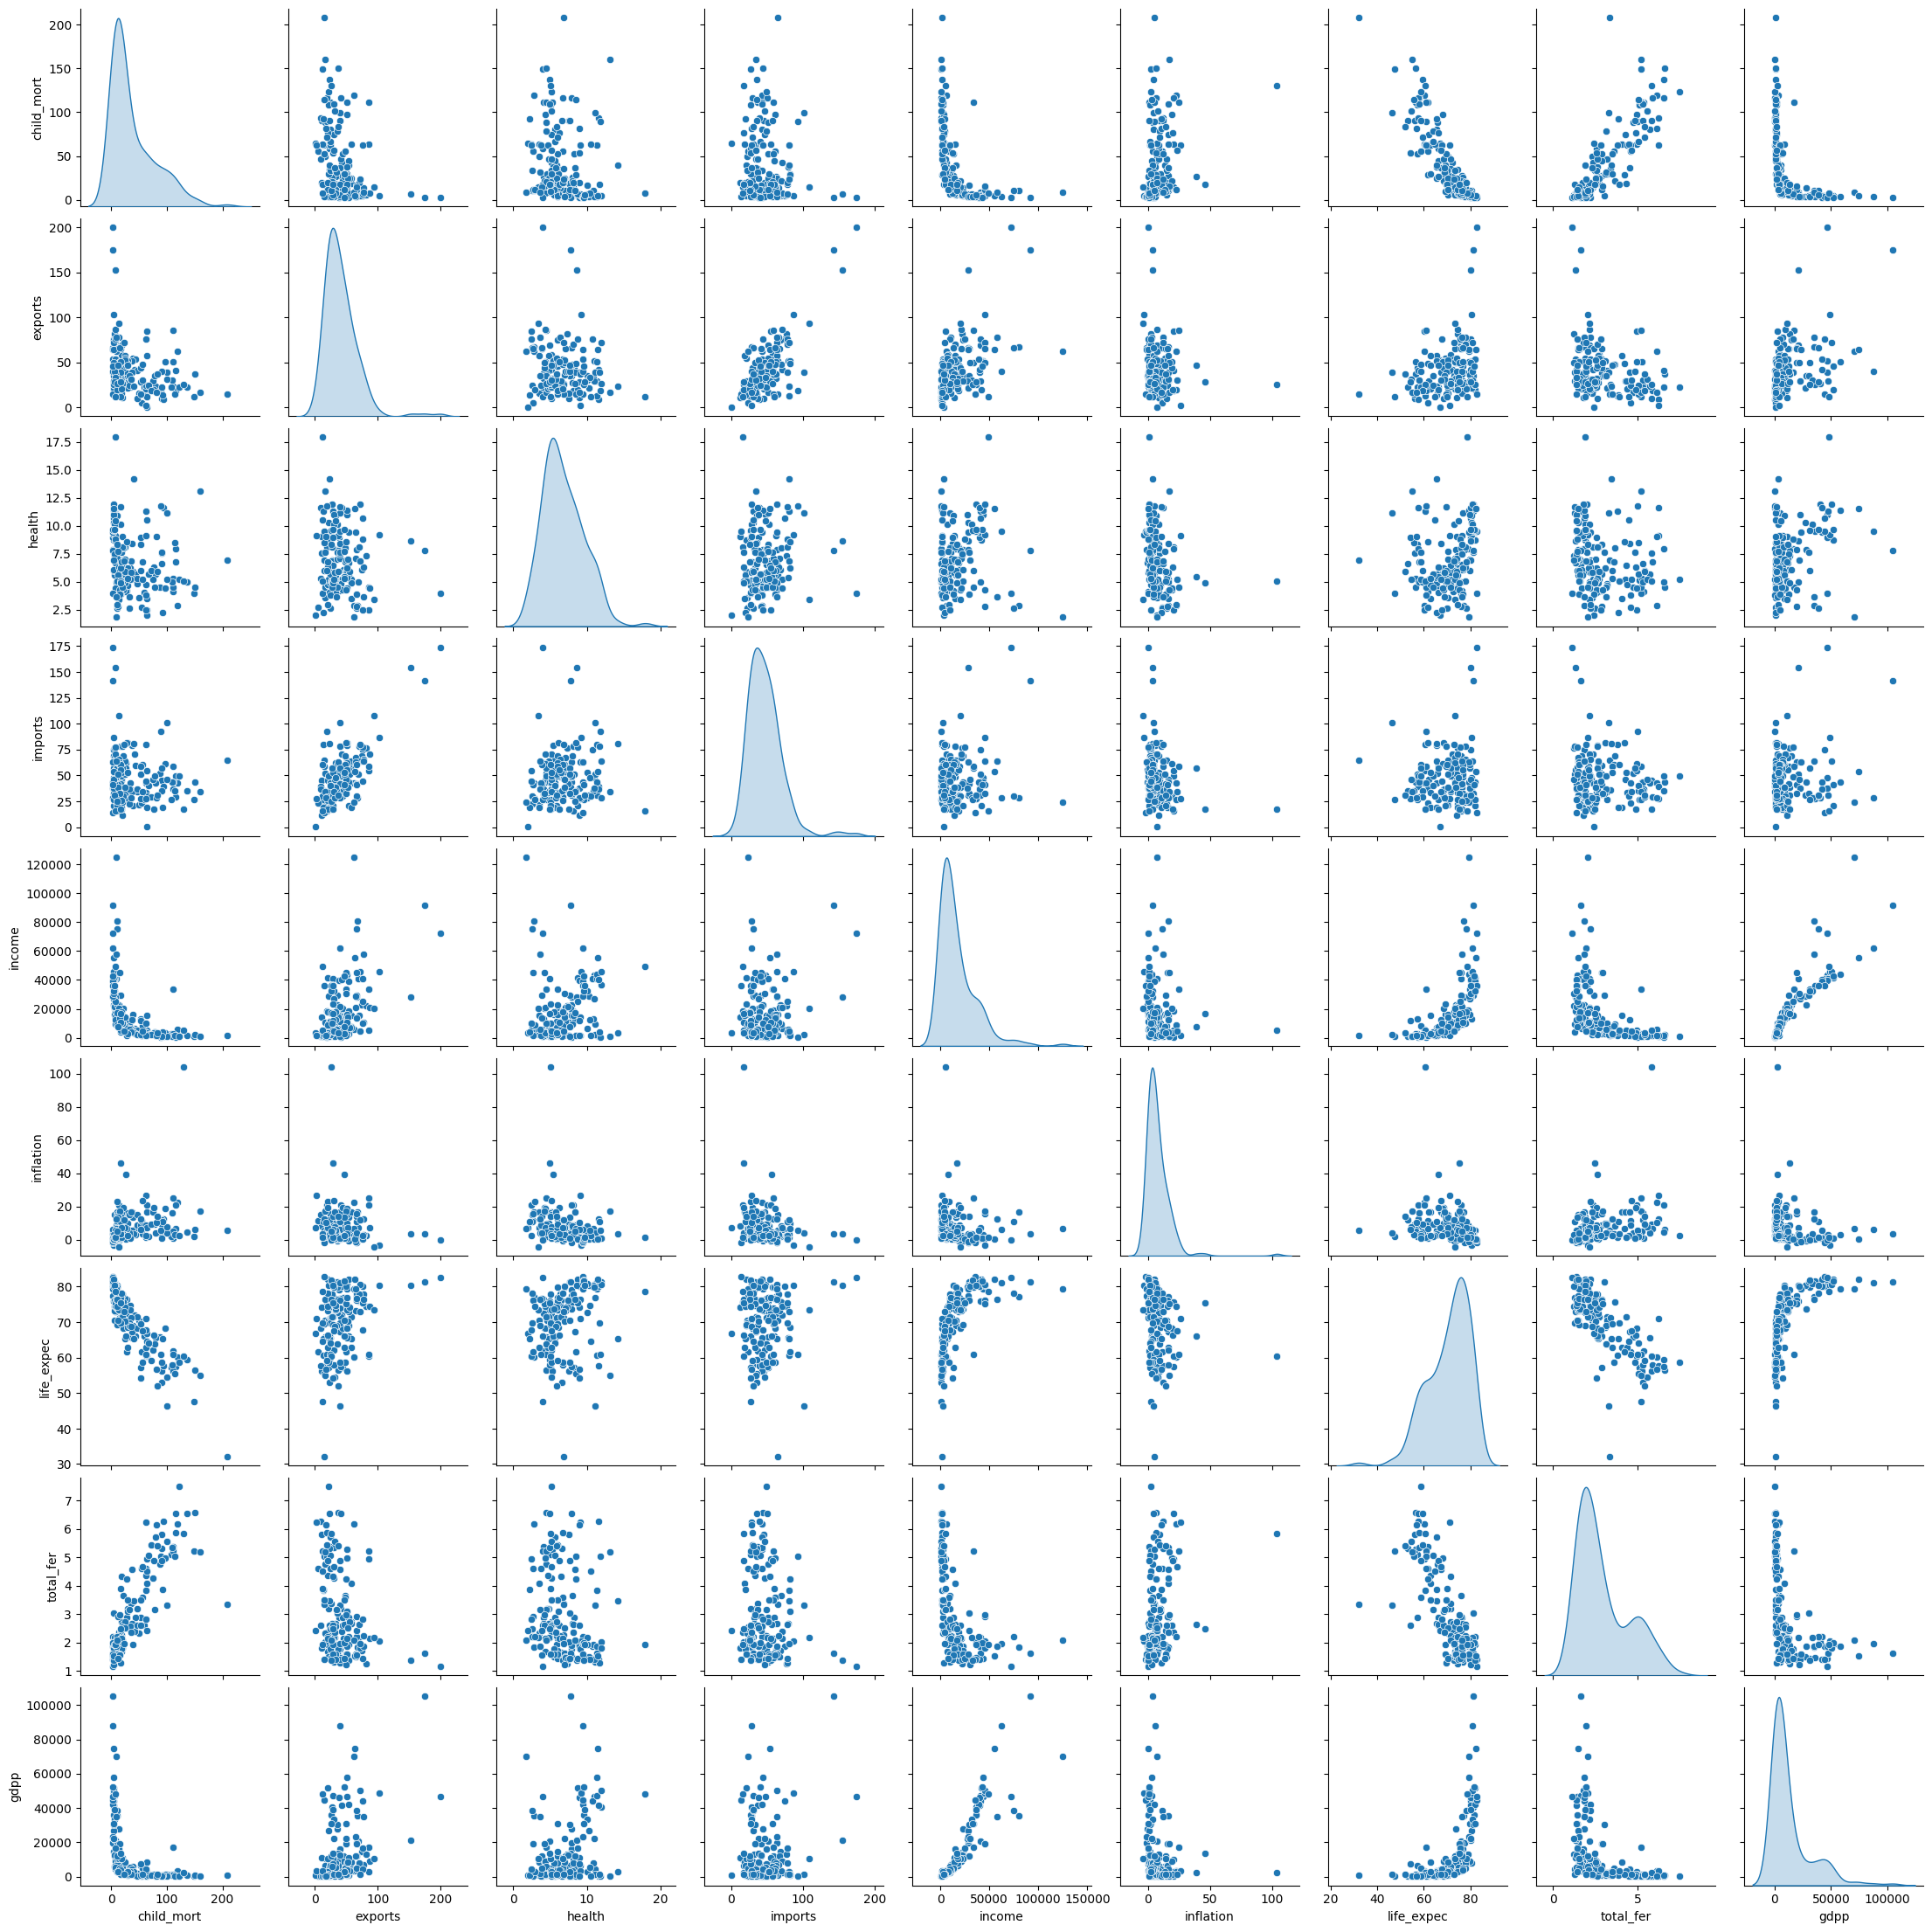

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

#### Scatterplot

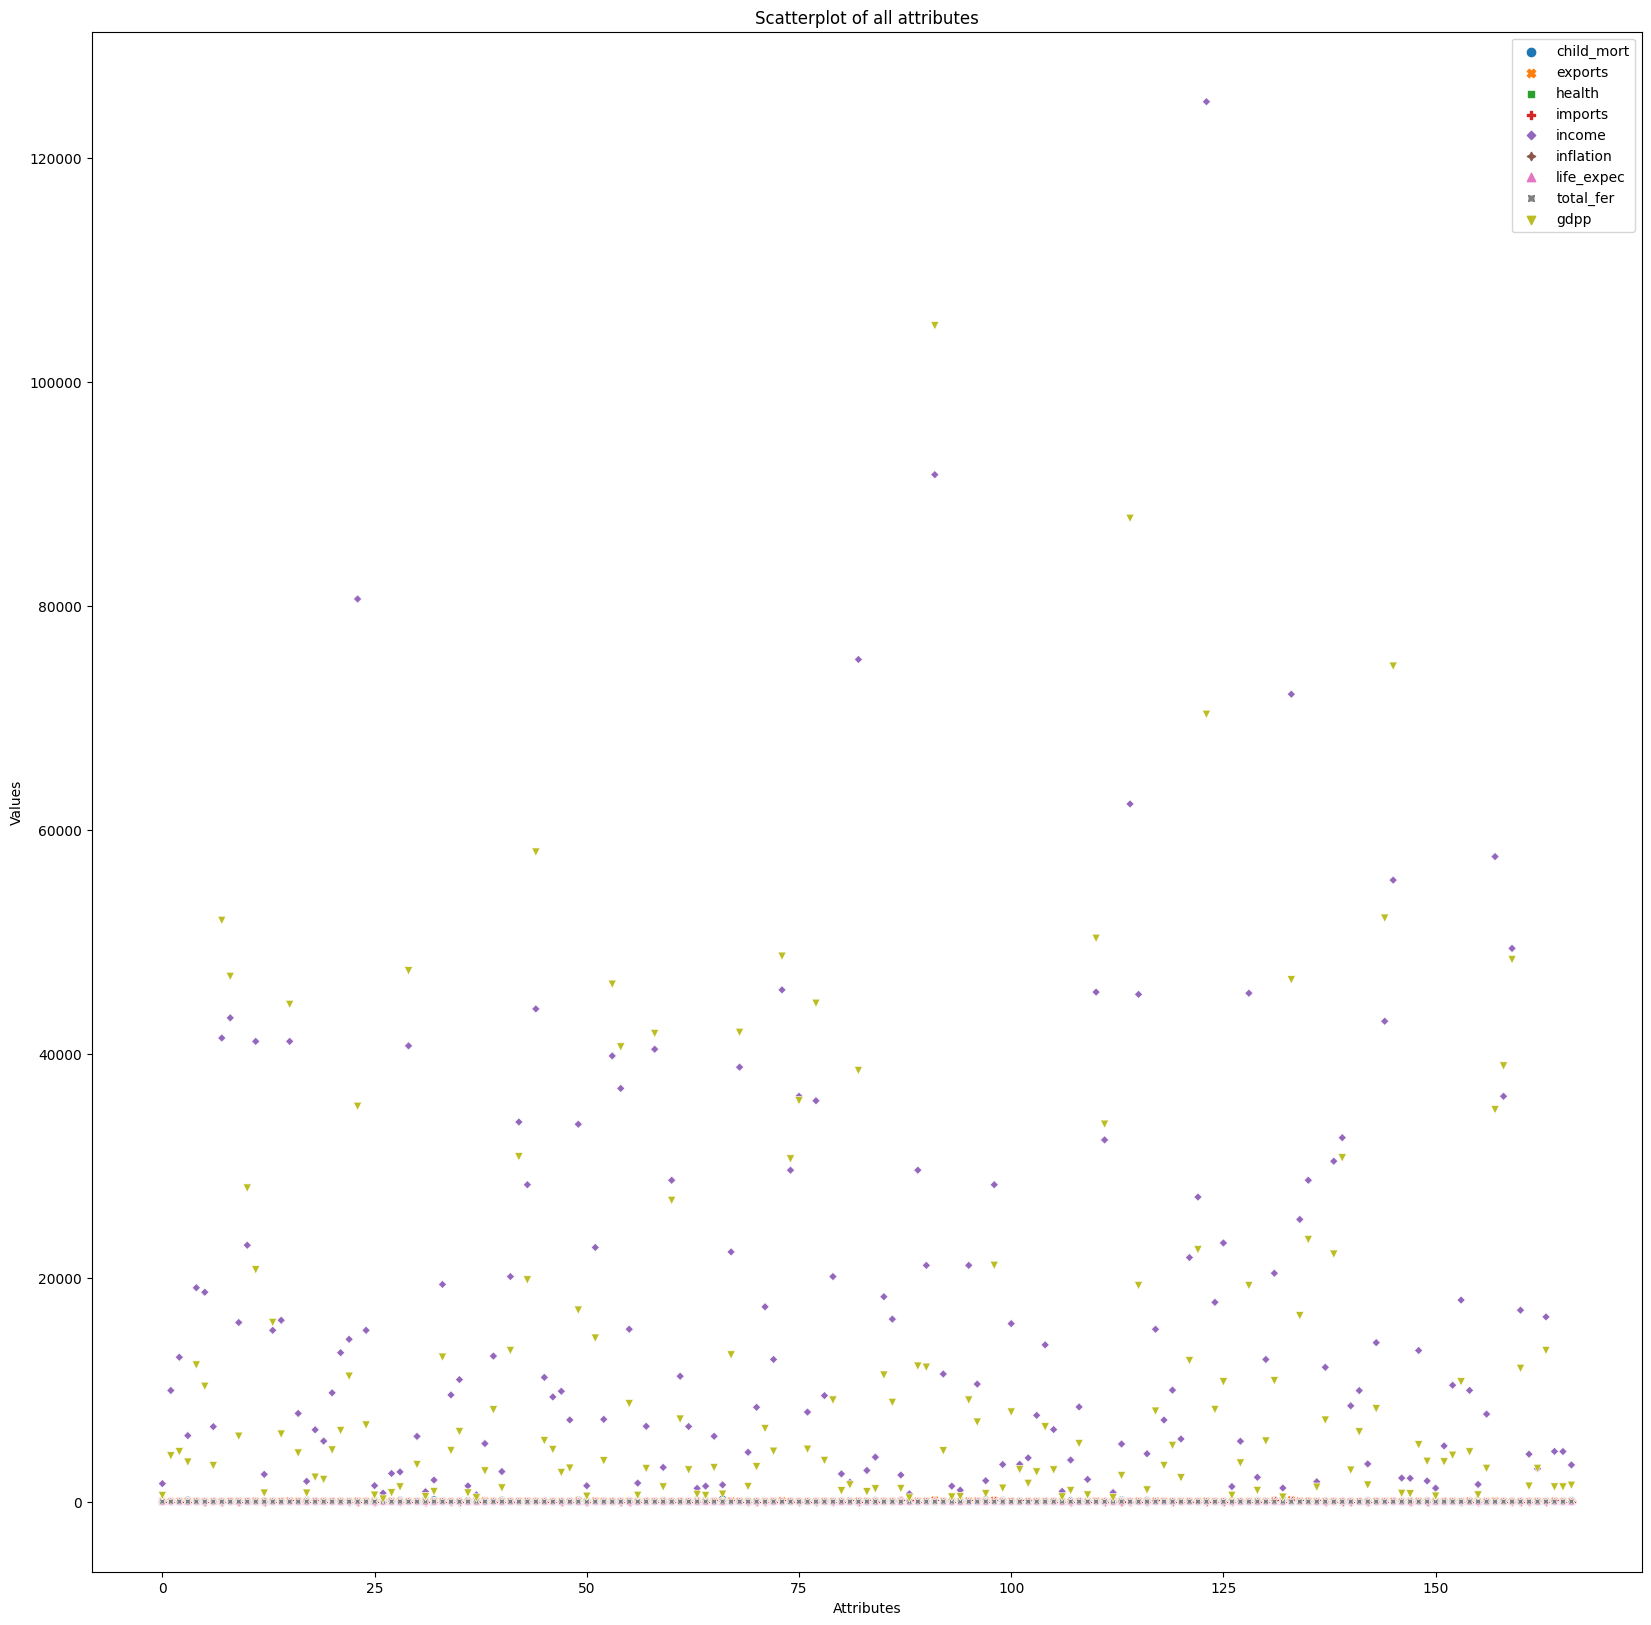

In [ ]:
# plot scatterplots to see the relationship between attributes
plt.figure(figsize=(20,20))
sns.scatterplot(data=df)
plt.title('Scatterplot of all attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

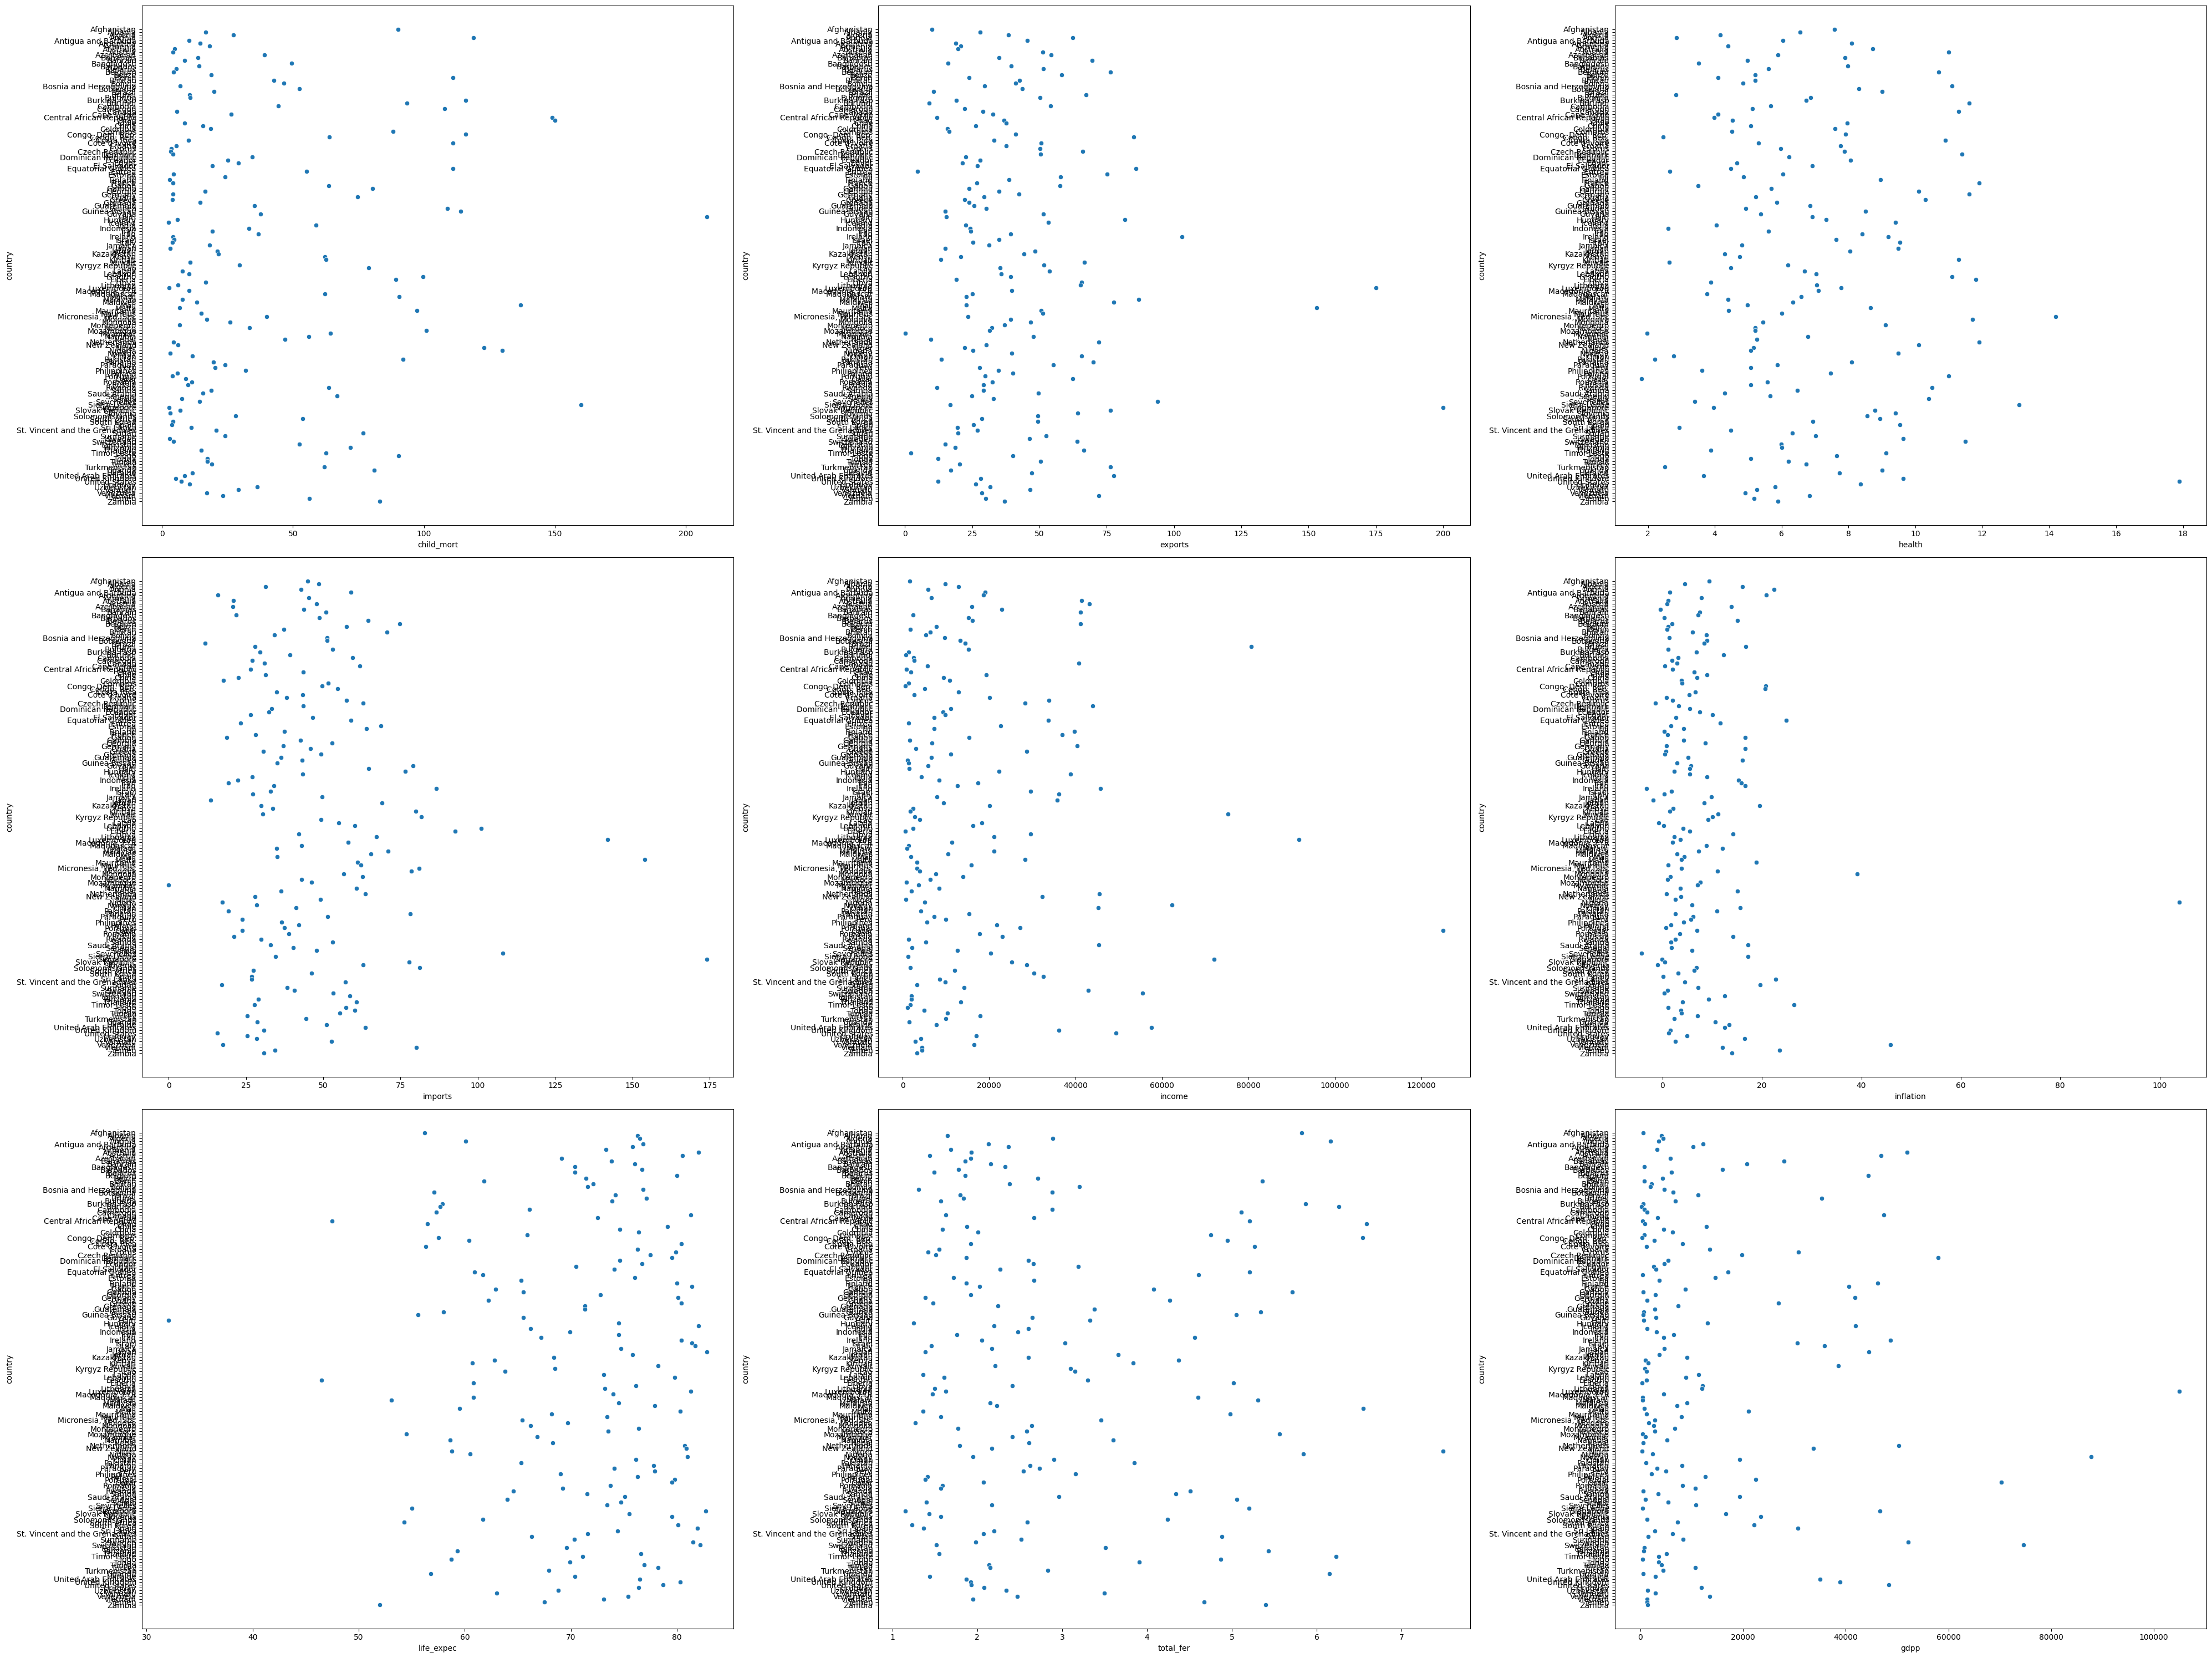

In [ ]:
# scatterplot of each attribute
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
sns.scatterplot(x=df['child_mort'],y=df['country'])
plt.subplot(3,3,2)
sns.scatterplot(x=df['exports'],y=df['country'])
plt.subplot(3,3,3)
sns.scatterplot(x=df['health'],y=df['country'])
plt.subplot(3,3,4)
sns.scatterplot(x=df['imports'],y=df['country'])
plt.subplot(3,3,5)
sns.scatterplot(x=df['income'],y=df['country'])
plt.subplot(3,3,6)
sns.scatterplot(x=df['inflation'],y=df['country'])
plt.subplot(3,3,7)
sns.scatterplot(x=df['life_expec'],y=df['country'])
plt.subplot(3,3,8)
sns.scatterplot(x=df['total_fer'],y=df['country'])
plt.subplot(3,3,9)
sns.scatterplot(x=df['gdpp'],y=df['country'])
plt.tight_layout()
plt.show()

#### Boxplot

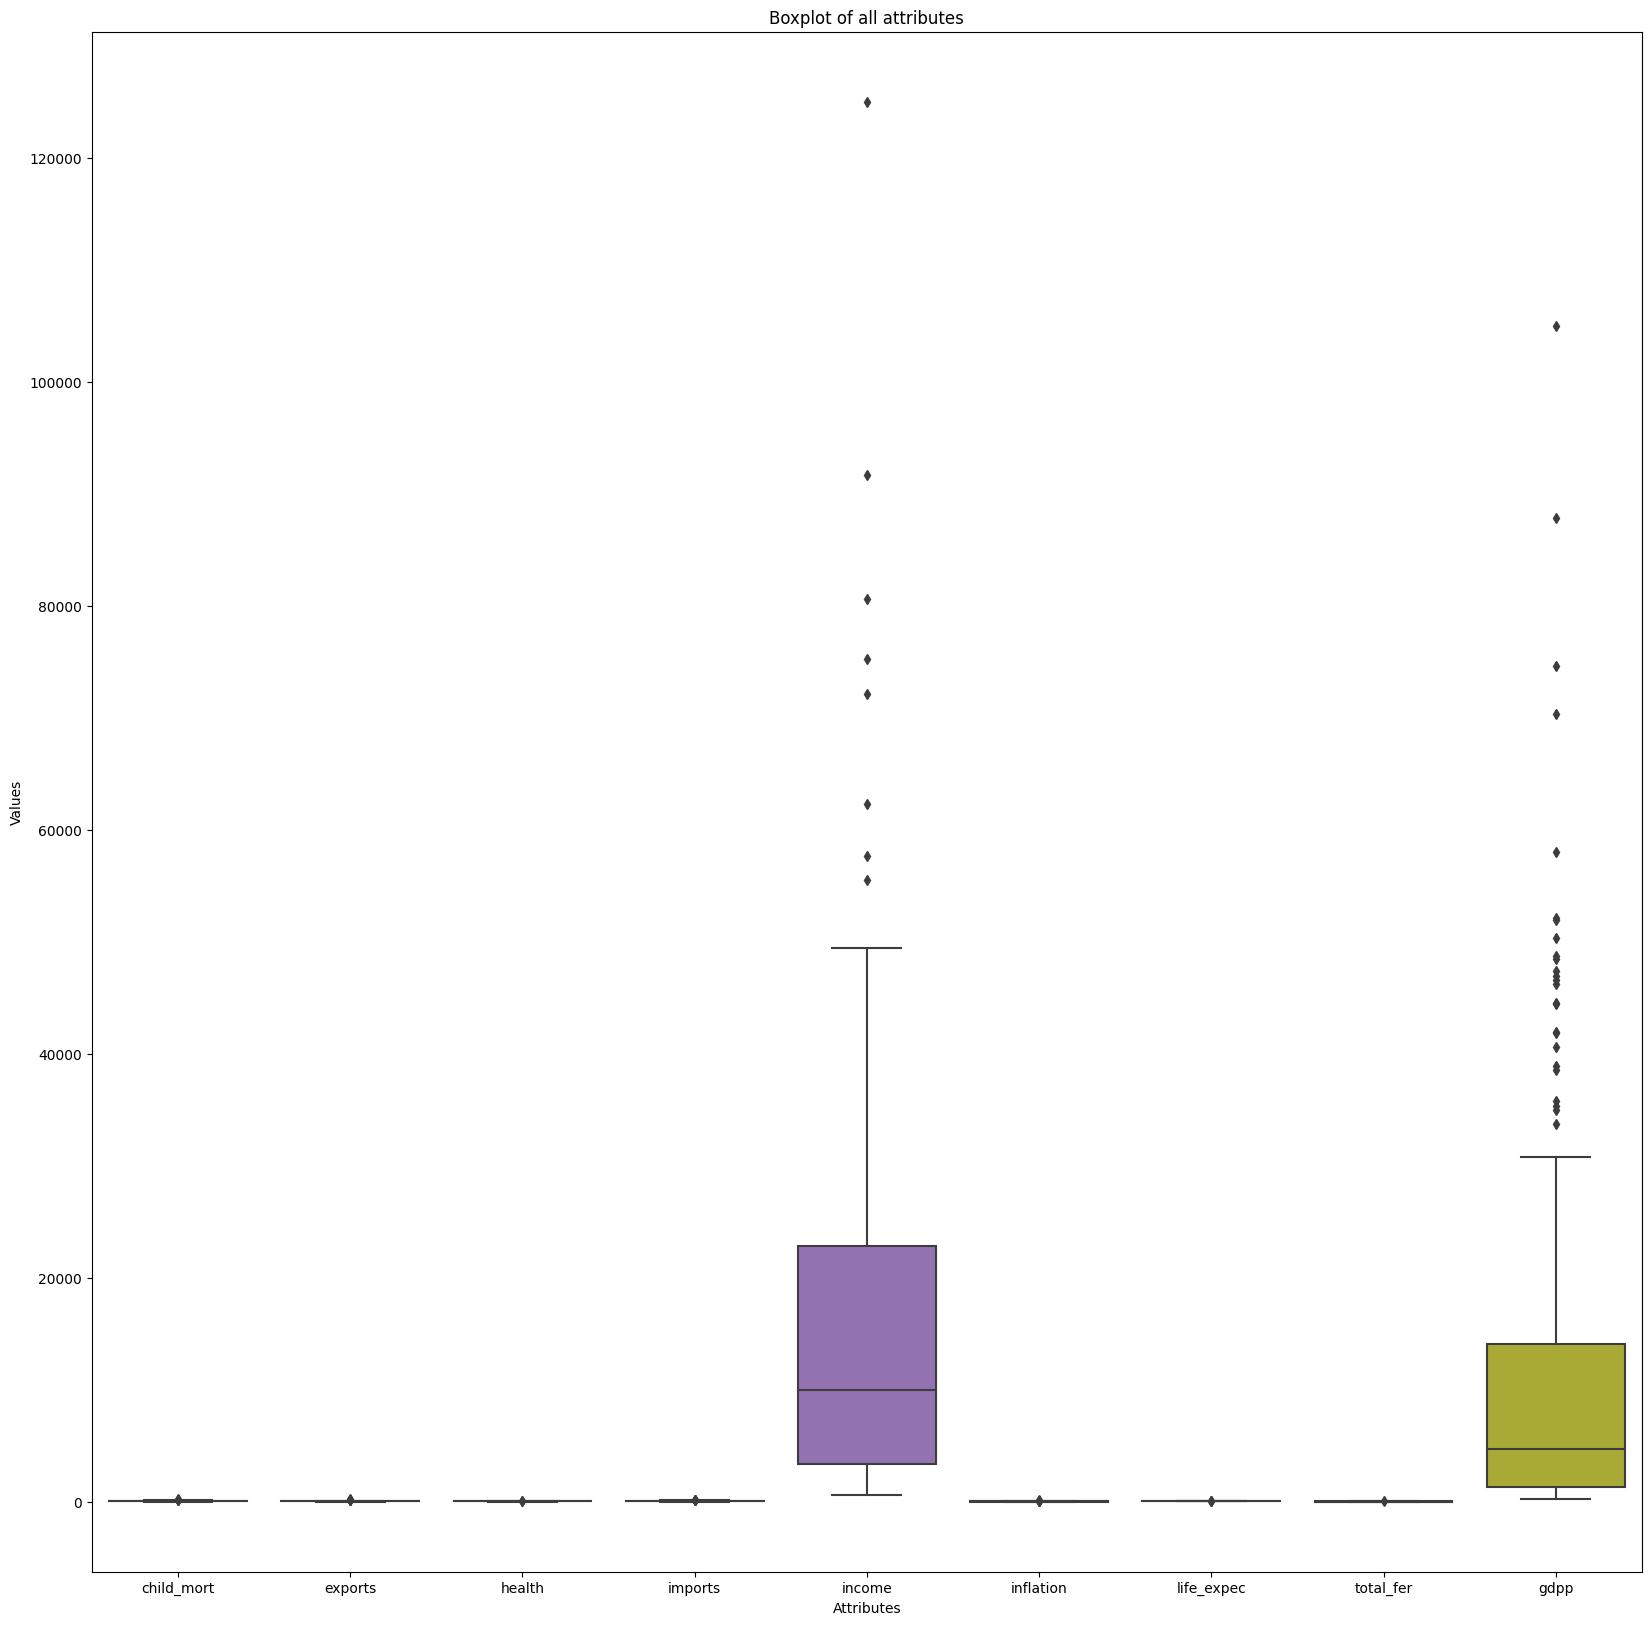

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.title('Boxplot of all attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

#### Lineplot

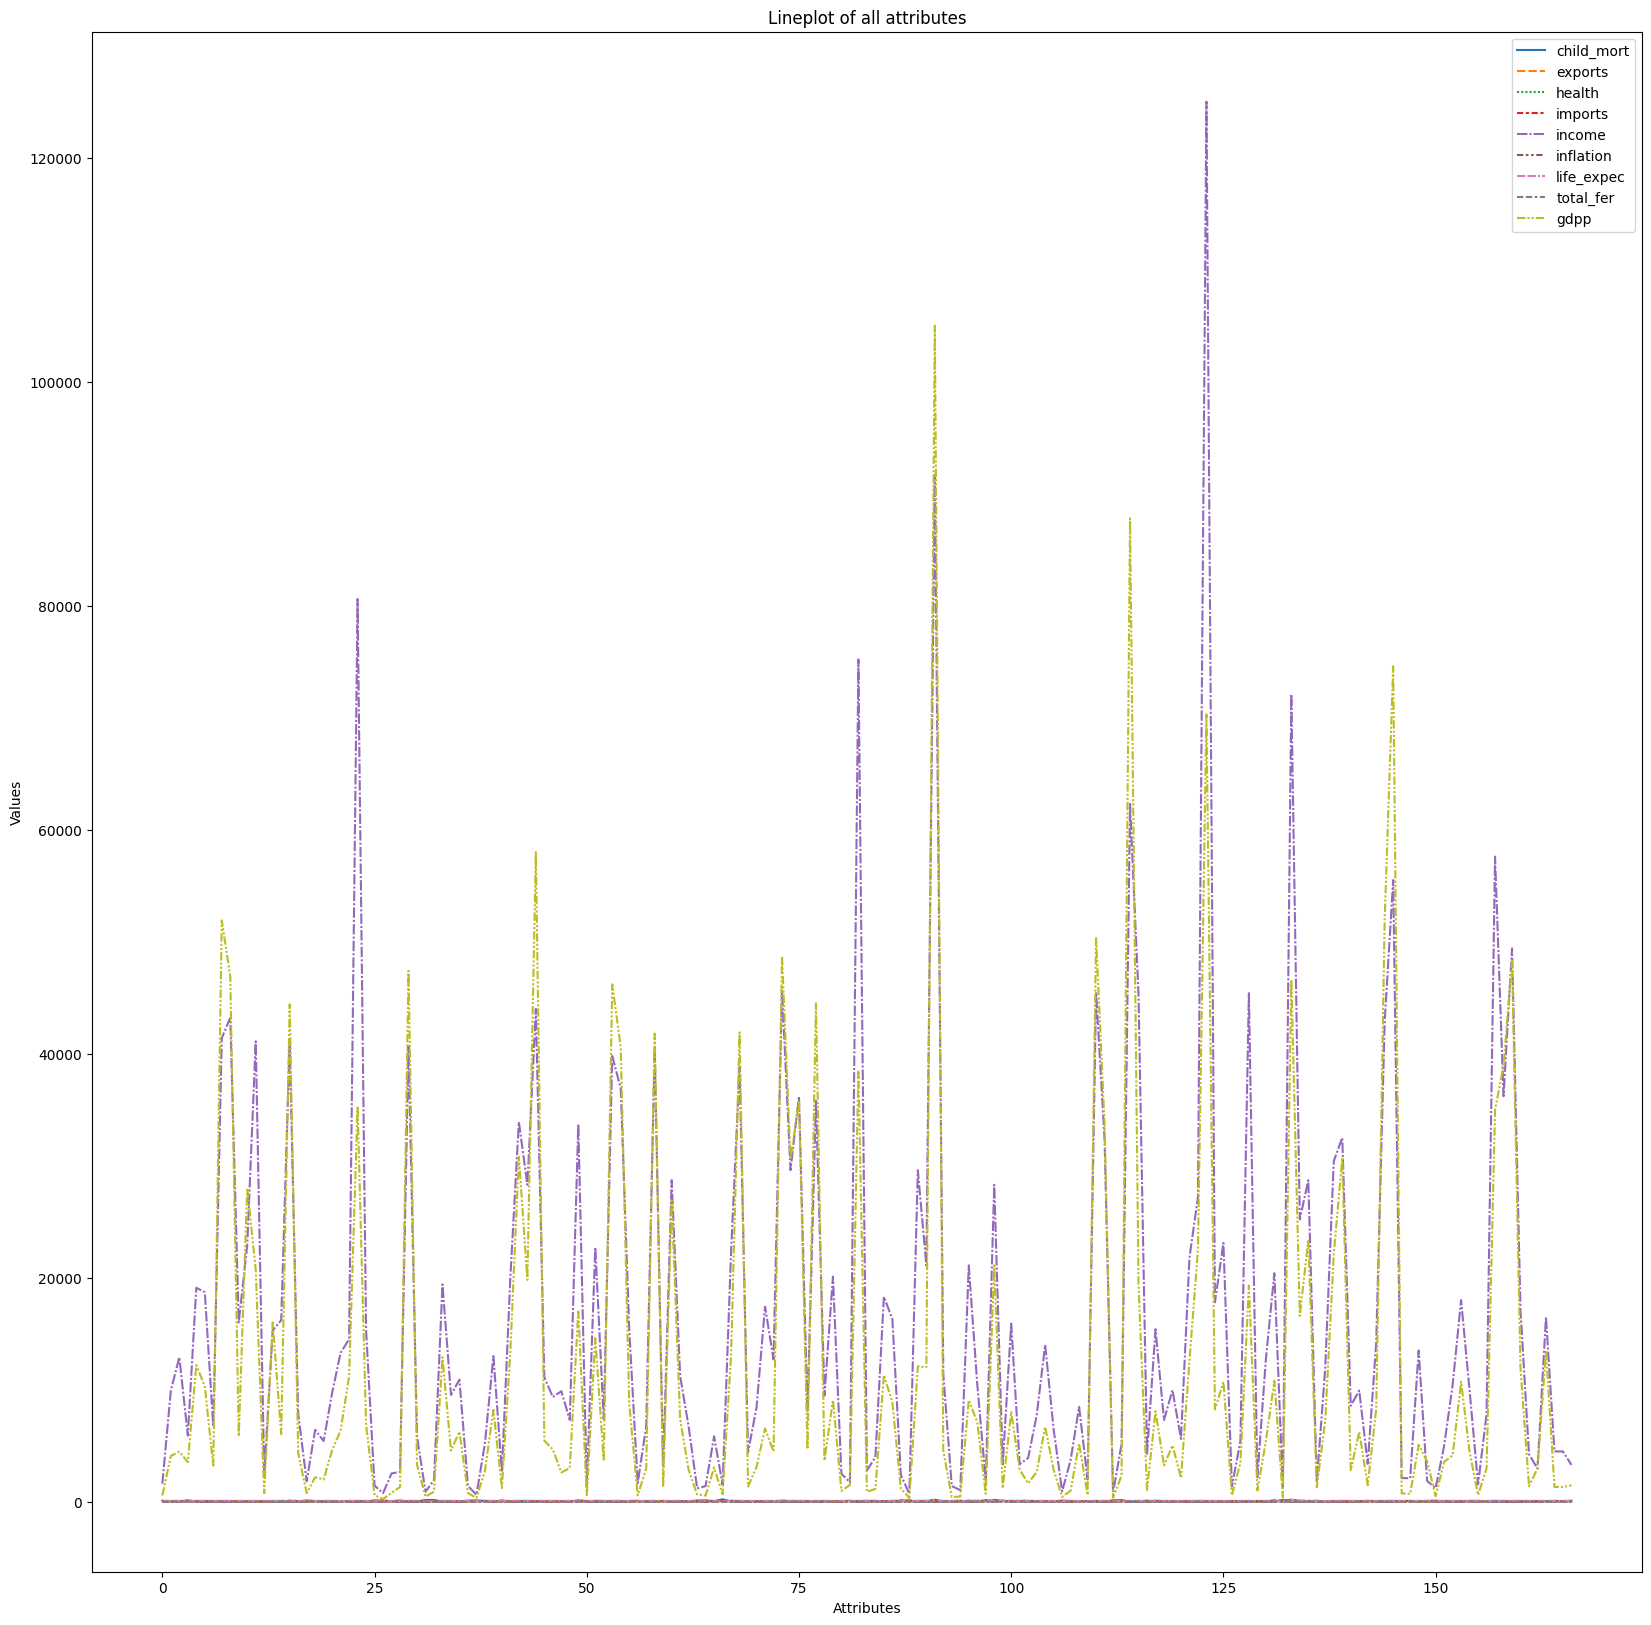

In [ ]:
plt.figure(figsize=(20,20))
sns.lineplot(data=df)
plt.title('Lineplot of all attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

#### Correlation heatmap

<Axes: >

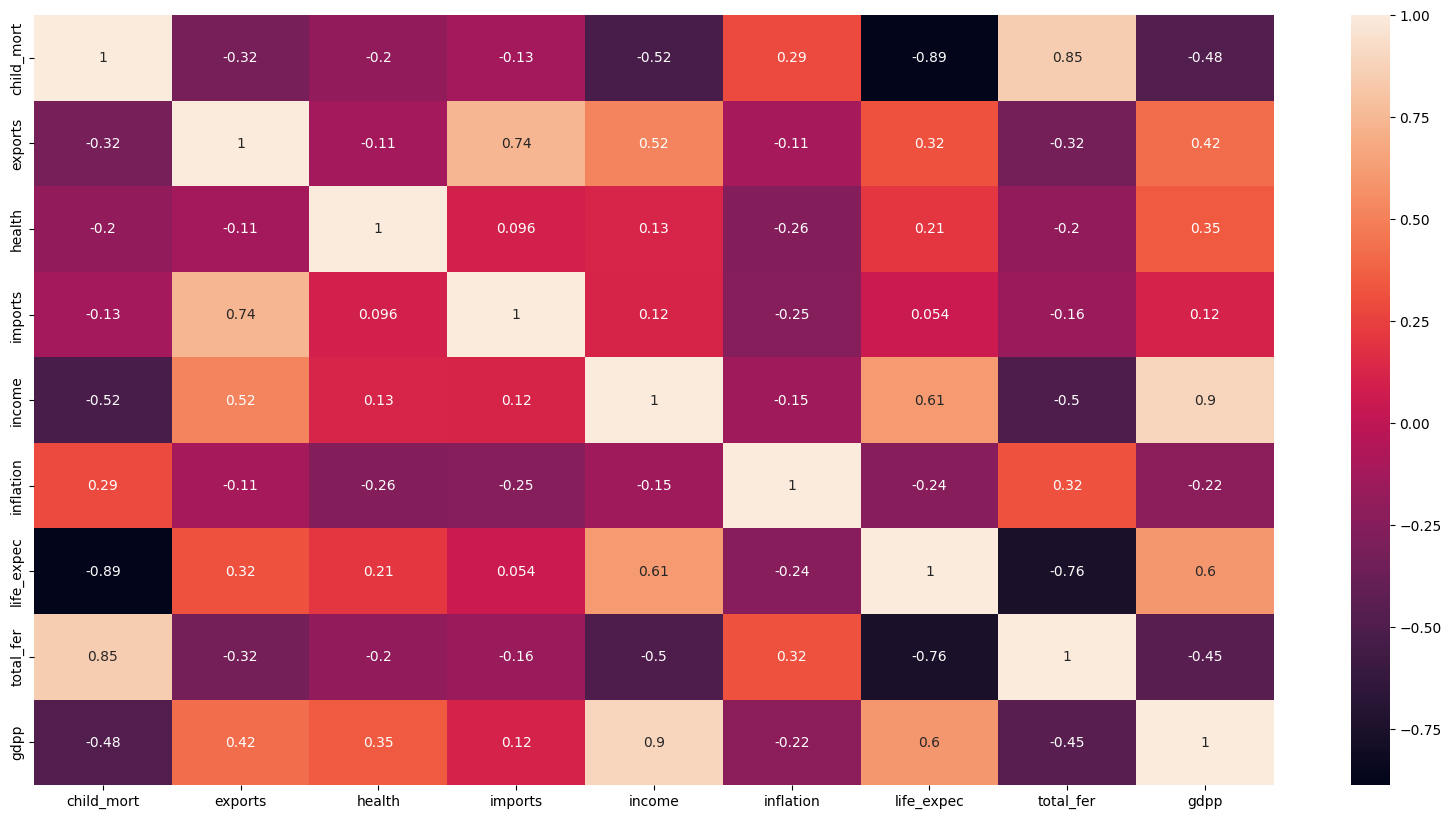

In [ ]:
# Creating correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

### Standardizing the dataset

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = df.drop('country', axis=1)
df1 = scaler.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df1
df1.describe()

child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -1.063687e-17  3.696311e-16  3.044803e-16  5.850277e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137852e+00 -4.337186e+00 -1.191250e+00 -6.968005e-01  
25%   -5.666409e-01 -5.927576e-01 -7.639023e-01 -6.366596e-01  
50%   -2.269504e-01  2.869576e-01 -3.564309e-01 -4.544309e-01  
75%    2.816364e-01  7.042584e-01  6.175252e-01  5.942100e-02  
max    9.129718e+00  1.380962e+00  3.009349e+00  5.036507e+00

## Applying PCA

Implement PCA to reduce the dimensionality of the data while retaining a significant portion of the variance. Identify the optimal number of principal components based on the explained variance ratio. Create scatter plots and heatmaps
for visualization.


In [6]:
from sklearn.decomposition import PCA

In [7]:
def apply_PCA(df1, n=2):
    pca = PCA(n_components=n)
    df2 = pca.fit_transform(df1)
    df2 = pd.DataFrame(df2)
    return pca.explained_variance_ratio_, df2

In [8]:
df1

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [ ]:
ratios = []
for i in range(1,10):
    pca = PCA(n_components=i, svd_solver='full')
    df2 = pca.fit_transform(df1)
    df2 = pd.DataFrame(df2)
    print("N Components =", pca.n_components_)
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    print("Sum of explained variance ratio:", pca.explained_variance_ratio_.sum())
    ratios.append(pca.explained_variance_ratio_.sum())
    print('------------------------------------------------------------------------')

N Components = 1
Explained Variance Ratio: [0.4595174]
Sum of explained variance ratio: 0.45951739786095946
------------------------------------------------------------------------
N Components = 2
Explained Variance Ratio: [0.4595174  0.17181626]
Sum of explained variance ratio: 0.6313336543771413
------------------------------------------------------------------------
N Components = 3
Explained Variance Ratio: [0.4595174  0.17181626 0.13004259]
Sum of explained variance ratio: 0.7613762433466718
------------------------------------------------------------------------
N Components = 4
Explained Variance Ratio: [0.4595174  0.17181626 0.13004259 0.11053162]
Sum of explained variance ratio: 0.871907861402391
------------------------------------------------------------------------
N Components = 5
Explained Variance Ratio: [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211]
Sum of explained variance ratio: 0.9453099756439513
-----------------------------------------------------------

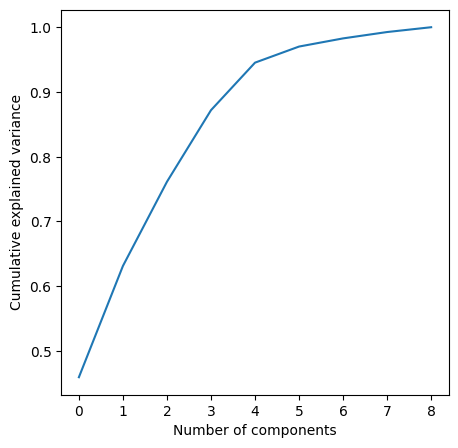

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(ratios)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Hence optimal number of components: 6

In [11]:
score, df2 = apply_PCA(df1, 6)
score.sum()

0.9701523224082288

### Visualizations

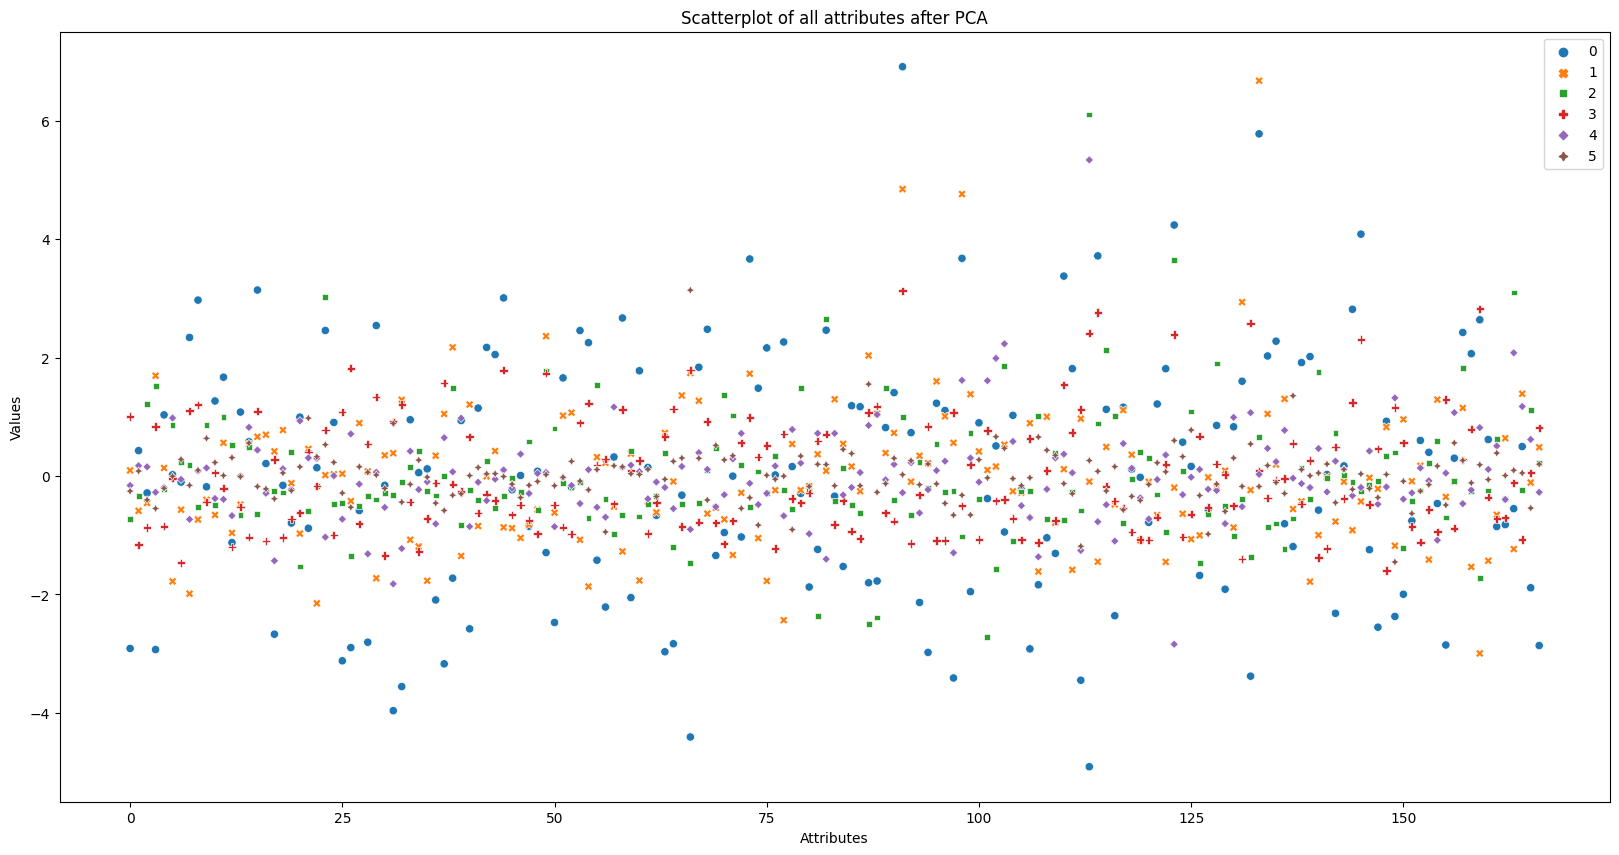

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df2, legend='full')
plt.title('Scatterplot of all attributes after PCA')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

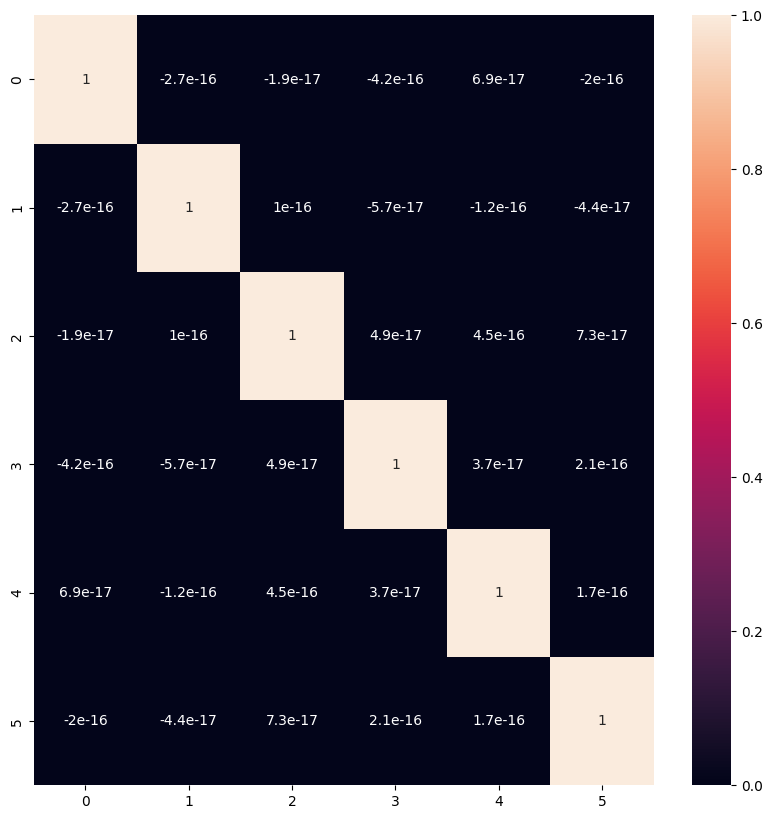

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True)
plt.show()

## K-means Clustering

Apply K-Means clustering algorithm to the PCA-transformed data. Determine the optimal number of clusters using techniques like both the elbow method
and silhouette score. Plot the clusters on a 2D scatter plot. Perform an analysis of
the clusters to identify the characteristics of each cluster.

In [9]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Elbow Method

In [ ]:
def elbow(clusters = 60, threshold = 5):
    wcss = []
    # wcss is the sum of squared distance between each point and the centroid
    # in a cluster. wcss = within cluster sum of squares
    optimal = clusters
    for i in range(1,clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df2)
        if i != 1 and abs(wcss[-1] - kmeans.inertia_) < threshold:
              optimal = i
              break
        wcss.append(kmeans.inertia_)
    return optimal, wcss

In [ ]:
clusters = 60
threshold = 0.001
optimal, wcss = elbow(clusters, threshold)
for i in range(len(wcss)):
    print(f"Cluster {i}:", wcss[i])

Cluster 0: 1458.1389405795674
Cluster 1: 1005.7357471785557
Cluster 2: 786.7321895964274
Cluster 3: 655.9841844982511
Cluster 4: 576.2672662096923
Cluster 5: 506.76784445257476
Cluster 6: 475.65750456563495
Cluster 7: 414.84875552141875
Cluster 8: 387.8963770305629
Cluster 9: 362.67931768923125
Cluster 10: 343.8673088928865
Cluster 11: 317.85433399669273
Cluster 12: 307.3642994894334
Cluster 13: 283.8140420400015
Cluster 14: 271.5933346253473
Cluster 15: 261.3372210693963
Cluster 16: 244.07169555972337
Cluster 17: 230.68204756522636
Cluster 18: 223.52741837567635
Cluster 19: 208.34527308284692
Cluster 20: 201.40884287195934
Cluster 21: 195.55232934133699
Cluster 22: 186.25379975995276
Cluster 23: 180.90939200966295
Cluster 24: 172.365131715509
Cluster 25: 161.89895823637139
Cluster 26: 159.60219302751125
Cluster 27: 151.12584718942716
Cluster 28: 147.31861068526825
Cluster 29: 138.46492365865834
Cluster 30: 140.0070002942101
Cluster 31: 131.77184673239492
Cluster 32: 129.60852950495067

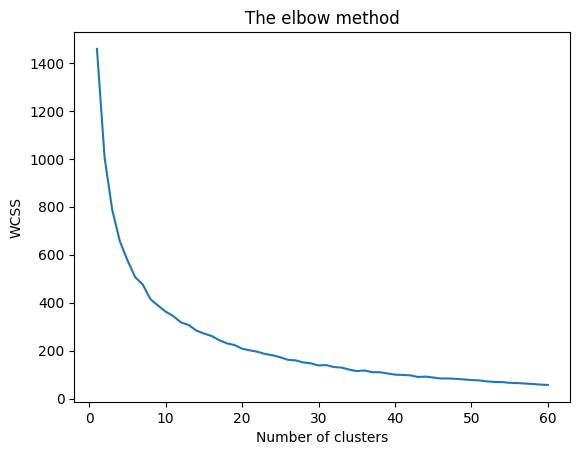

In [ ]:
plt.plot(range(1,len(wcss)+1), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Thus optimal number of clusters is around 17 since this is an elbow point

### Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
def silhouette(clusters = 60, threshold = 5):
    wcss = []
    # wcss is the sum of squared distance between each point and the centroid
    # in a cluster. wcss = within cluster sum of squares
    optimal = clusters
    for i in range(2,clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df2)
        score_ = silhouette_score(df2, kmeans.labels_)
        if i != 2 and abs(wcss[-1] - score_) < threshold:
              optimal = i
              break
        wcss.append(score_)
    return optimal, wcss

In [ ]:
clusters = 60
threshold = 0.001
optimal, wcss = silhouette(clusters, threshold)
print(f"Optimal number of clusters with threshold {threshold}:", optimal)
wcss[-1]

Optimal number of clusters with threshold 0.001: 3


0.29637364602520705

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df2)
print("Labels:", kmeans.labels_)
print("Cluster Centers:", kmeans.cluster_centers_)
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

Labels: [0 2 2 0 2 2 2 1 1 2 2 1 2 2 2 1 2 0 2 2 2 0 2 1 2 0 0 2 0 1 2 0 0 2 2 2 0
 0 0 2 0 2 1 1 1 2 2 2 2 0 0 2 2 1 1 0 0 2 1 0 1 2 2 0 0 2 0 2 1 2 2 2 0 1
 1 1 2 1 2 2 0 0 1 2 0 2 2 0 0 2 2 1 2 0 0 2 2 0 1 0 2 2 2 2 2 2 0 2 0 2 1
 1 0 0 1 2 0 2 2 2 2 2 1 1 2 2 0 2 2 0 2 2 0 1 1 1 2 0 1 1 2 2 0 2 1 1 2 0
 2 0 0 2 2 2 2 0 2 1 1 1 2 2 2 2 2 0 0]
Cluster Centers: [[-2.43461995  0.41127566 -0.09616666  0.69171004 -0.14145844 -0.04411636]
 [ 2.76977273 -0.21301421  0.06888632  0.86680107 -0.17822588 -0.02626124]
 [ 0.17518237 -0.13882672  0.02428483 -0.75851441  0.15553189  0.03593897]]
Inertia: 786.7321895964274
Iterations: 11


### Performing an analysis of the formed clusters

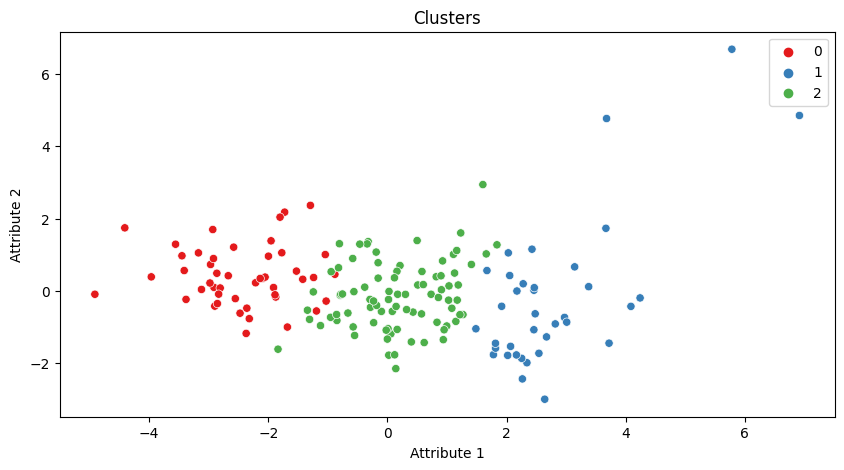

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df2[0], y=df2[1], hue=kmeans.labels_, palette='Set1')
plt.title('Clusters')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()

In [30]:
df3 = df.copy(deep=True)
df3['cluster'] = kmeans.labels_
df_new = pd.read_csv('Country-data.csv')
df3['country'] = df_new['country']
df3.groupby('cluster').mean()

child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
0         92.961702  29.151277  6.388511  42.323404   3942.404255  12.019681   
1          5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   
2         21.927381  40.243917  6.200952  47.473404  12305.595238   7.600905   

         life_expec  total_fer          gdpp  
cluster                                       
0         59.187234   5.008085   1922.382979  
1         80.127778   1.752778  42494.444444  
2         72.814286   2.307500   6486.452381

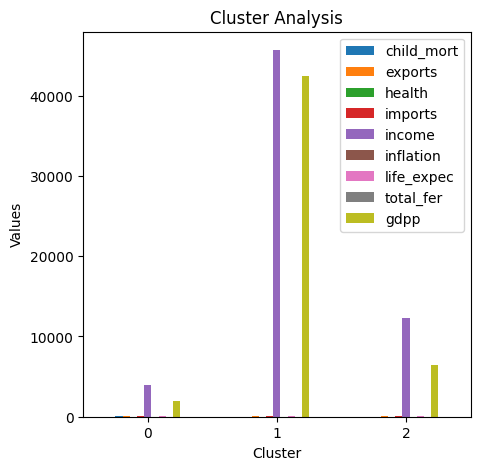

In [31]:
df3.groupby('cluster').mean().plot(kind='bar', figsize=(5,5))
plt.title('Cluster Analysis')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

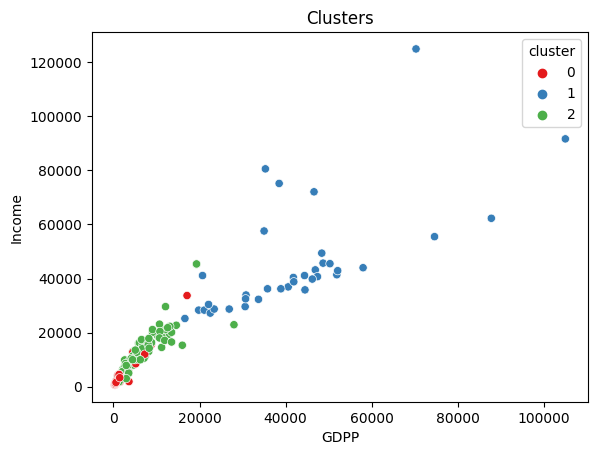

In [33]:
sns.scatterplot(x=df3['gdpp'], y=df3['income'], hue=df3['cluster'], palette='Set1')
plt.title('Clusters')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

In [42]:
df_cluster = pd.DataFrame(df3.groupby('cluster')['country'].unique())
df_cluster

country
cluster                                                   
0        [Afghanistan, Angola, Benin, Botswana, Burkina...
1        [Australia, Austria, Bahrain, Belgium, Brunei,...
2        [Albania, Algeria, Antigua and Barbuda, Argent...

In [48]:
for i in range(len(df_cluster)):
    print(f"Number of countries in cluster {i}:", len(df_cluster['country'][i]))

Number of countries in cluster 0: 47
Number of countries in cluster 1: 36
Number of countries in cluster 2: 84


Thus we can observe that countries belonging to cluster 0 have the lowest GDPP vs Income, but the countries belonging to the cluster 1 have the highest GDPP vs Income. Its also interesting to note that the coutries in cluster 2 actually lies in between these two clusters and has around 36 countries in it. The average child mortality rate of cluster one is also the lowest among all with the highest exports and imports too but the lowest inflation on an average. The life expectancy of these countries is also better than the rest of the countries in other clusters.